# Machine Learning II. Exercise Sheet 3. Exercise 5.

### 6169275: Iurii Mozzhorin

## Predictive distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
# Define the constants
s = 1/5
beta = 1/(0.3**2) # Noise presision tau_e
alpha = 1         # Prior presision tau_0
phi0_const = 0.5

In [139]:
# Define the basis functions
phi = lambda i,x : np.exp(-(x-(i/8))**2/(2*s**2))
phi0 = lambda xList : np.full((len(xList),), phi0_const)

In [164]:
# Plot the basis functions
def plotGauss():
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title('Gaussian basis functions')
    xPlot = np.arange(0.0, 1.0, 0.01)
    plt.plot(xPlot, phi0(xPlot))
    for i in range(0,9):
        plt.plot(xPlot, phi(i, xPlot))       
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_aspect('equal')    
    plt.show()

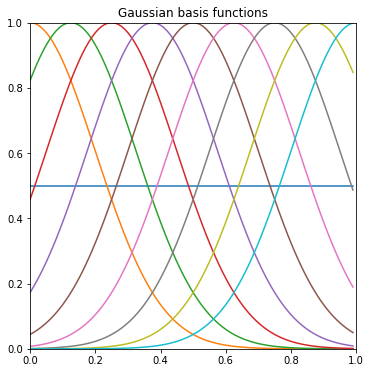

In [165]:
plotGauss()

In [142]:
# Generate x and noise
def genX(N):    
    x = np.random.uniform(low=0.0, high=1.0, size=N)    
    noise = np.random.normal(loc=0.0, scale=(beta**(-0.5)), size=N)
    return x, noise

In [143]:
# Define the target function
f = lambda x : np.sin(2*np.pi*x)
t = lambda x,noise : f(x) + noise

In [144]:
# Define a vector and a matrix of basis functions
def phi_vector(xPoint) :
    phi_vect = np.array([phi0_const])    
    for i in range(1,9):
        phi_vect = np.append(phi_vect, phi(i,xPoint))       
    return phi_vect

def phi_matrix(xList):
    phi_matr = np.array([phi_vector(xList[0])])    
    for i in range(1, len(xList)):
        phi_matr = np.vstack((phi_matr, phi_vector(xList[i])))       
    return phi_matr

In [145]:
# Define a matrix Sn
def Sn_matrix(xList):
    phi_matr = phi_matrix(xList)
    Sn_inverse = np.add(np.eye(9)*alpha, beta*np.dot(phi_matr.T, phi_matr))
    return np.linalg.inv(Sn_inverse)

In [146]:
# Define a variance of the predictive distribution
sigmaN = lambda x,Sn : (1/beta + np.dot(np.dot(phi_vector(x).T, Sn), phi_vector(x)))**(0.5)

In [147]:
# Define a mean of the predictive distribution
mean_pred = lambda Sn,Phi,t : beta*np.dot(np.dot(Sn,Phi.T),t)

In [148]:
# Generate the mean, mean-sigma and mean+sigma of the predictive distribution
def yPlot(data, noise, xPlot):
    Sn = Sn_matrix(data)
    mn = mean_pred(Sn,phi_matrix(data),t(data,noise))
    mean = np.array([])
    y1 = np.array([])
    y2 = np.array([])
    for x in xPlot:        
        s = sigmaN(x,Sn)
        meanX = np.dot(mn.T, phi_vector(x))
        mean = np.append(mean, meanX)
        y1 = np.append(y1, meanX - s)
        y2 = np.append(y2, meanX + s)
    return mean, y1, y2

In [199]:
# Plot the predictive distribution
def plot_predictions(x, noise):
    xPlot = np.linspace(0,1,100)    
    fig = plt.figure(figsize=(16, 10))
    
    ax = fig.add_subplot(221)
    plt.suptitle('Predictive distribution', size=22)
    ax.set_title('N = 1')    
    mean, y1, y2 = yPlot(x[:1], noise[:1], xPlot)
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:1],t(x[:1],noise[:1]), 'o')
    plt.plot(xPlot,mean, color='red')
    plt.fill_between(xPlot, y1, y2, alpha=0.2, color='red')
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])
    
    ax = fig.add_subplot(222)
    ax.set_title('N = 2')
    mean, y1, y2 = yPlot(x[:2], noise[:2], xPlot)
    plt.plot(xPlot,f(xPlot), color='green', label="f(x)")
    plt.plot(x[:2],t(x[:2],noise[:2]), 'o', label="t(x)")
    plt.plot(xPlot,mean, color='red', label="mean")
    plt.fill_between(xPlot, y1, y2, alpha=0.2, color='red', label="mean±sigma")
    plt.legend(loc=1)
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])

    ax = fig.add_subplot(223)
    ax.set_title('N = 4')
    mean, y1, y2 = yPlot(x[:4], noise[:4], xPlot)
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:4],t(x[:4],noise[:4]), 'o')
    plt.plot(xPlot,mean, color='red')
    plt.fill_between(xPlot, y1, y2, alpha=0.2, color='red')
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])

    ax = fig.add_subplot(224)
    ax.set_title('N = 25')    
    mean, y1, y2 = yPlot(x[:25], noise[:25], xPlot)
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:25],t(x[:25],noise[:25]), 'o')
    plt.plot(xPlot,mean, color='red')
    plt.fill_between(xPlot, y1, y2, alpha=0.2, color='red')
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])
    plt.show()

# Samples from the posterior distribution

In [188]:
# Sample 5 random functions from the posterior distributions over w
def postPlot5(data, noise, xPlot):
    f = lambda x : np.sin(2*np.pi*x)
    t = lambda x, noise : f(x) + noise
    Sn = Sn_matrix(data)
    mn = mean_pred(Sn,phi_matrix(data),t(data,noise))
    post5 = []
    for i in range(5):
        posterior = np.random.multivariate_normal(mn, Sn)
        y = np.array([])
        for x in xPlot:
            y = np.append(y, np.dot(posterior,phi_vector(x)))
        post5.append(y)
    return np.array(post5)

In [201]:
# Plot this 5 functions for different amount of data
def plot_posteriors(x, noise):
    xPlot = np.linspace(0,1,100)   

    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(221)
    plt.suptitle('Posterior distributions', size=22)
    ax.set_title('N = 1')
    N=1
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:N],t(x[:N],noise[:N]), 'o')
    postSamples = postPlot5(x[:N], noise[:N], xPlot)
    for i in postSamples:
        plt.plot(xPlot, i, color='red' )
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])

    ax = fig.add_subplot(222)
    ax.set_title('N = 2')
    N=2
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:N],t(x[:N],noise[:N]), 'o')
    postSamples = postPlot5(x[:N], noise[:N], xPlot)
    for i in postSamples:
        plt.plot(xPlot, i, color='red' )
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])

    ax = fig.add_subplot(223)
    ax.set_title('N = 4')
    N=4
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:N],t(x[:N],noise[:N]), 'o')
    postSamples = postPlot5(x[:N], noise[:N], xPlot)
    for i in postSamples:
        plt.plot(xPlot, i, color='red' )
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])

    ax = fig.add_subplot(224)
    ax.set_title('N = 25')
    N=25
    plt.plot(xPlot,f(xPlot), color='green')
    plt.plot(x[:N],t(x[:N],noise[:N]), 'o')
    postSamples = postPlot5(x[:N], noise[:N], xPlot)
    for i in postSamples:
        plt.plot(xPlot, i, color='red' )
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])

    plt.show()

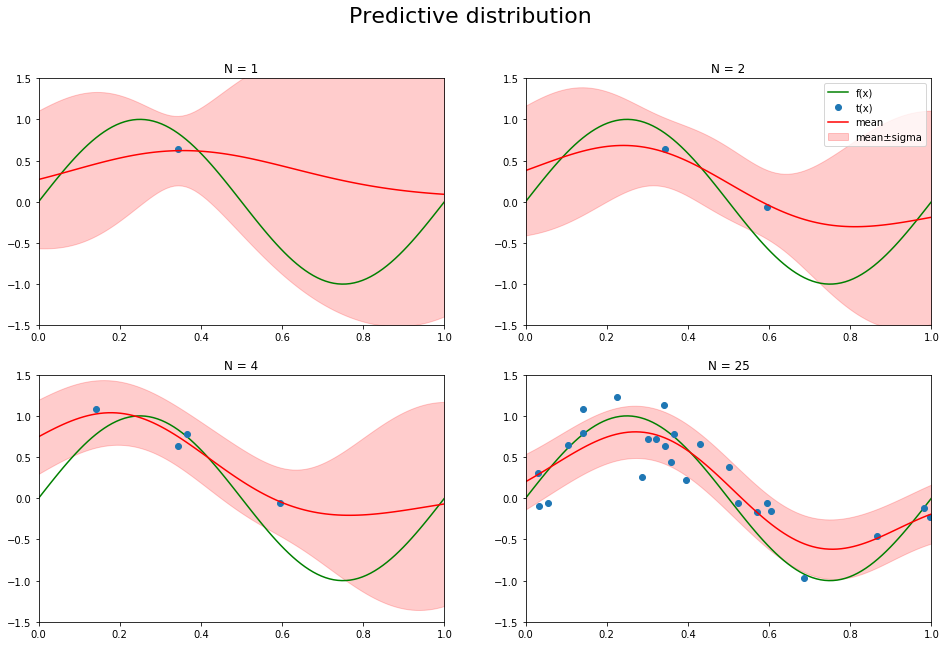

In [203]:
x, noise = genX(25)
plot_predictions(x, noise)

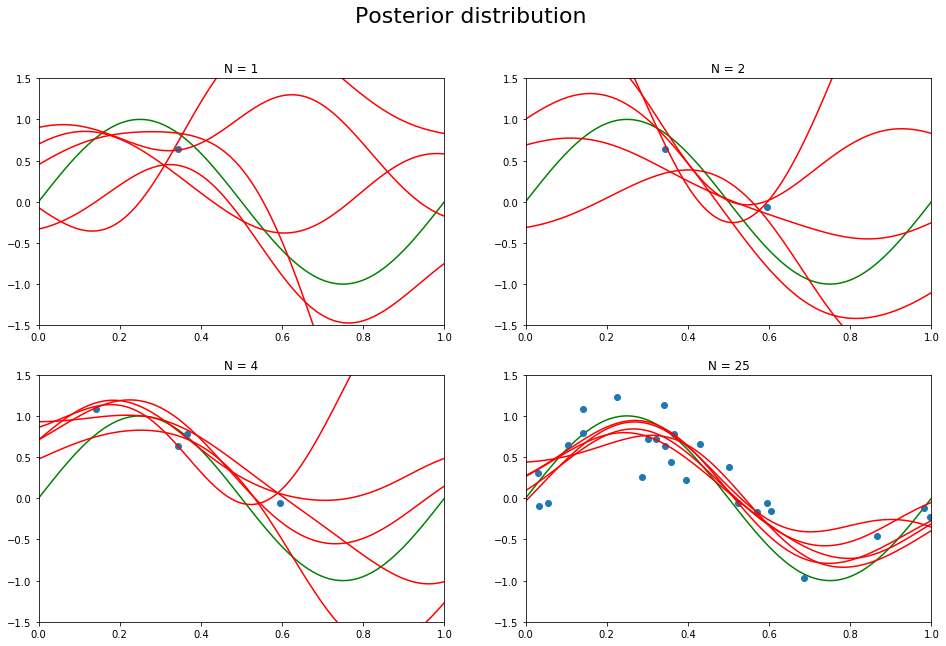

In [204]:
plot_posteriors(x, noise)